## Importing Libraries 

In [21]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Adding Seaborn Aesthetics for Vizualization

In [22]:
sns.set_context('paper')
sns.set_style('whitegrid')

## Reading the Dataset 

In [23]:
X = []
Y = []

In [24]:
non_decimal = re.compile(r'[^\d]+')

In [25]:
for line in open('moore.csv'):
    r = line.split('\t') 
    
    x = int(non_decimal.sub('',r[2].split('[')[0]))
    y = int(non_decimal.sub('',r[1].split('[')[0]))
    X.append(x)
    Y.append(y)

In [26]:
X = np.array(X)
Y = np.array(Y)

## Plotting Data 

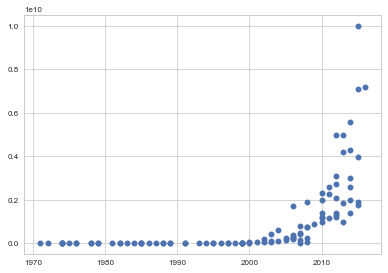

In [28]:
plt.scatter(X,Y)
plt.show()

## Normalizing for Linearity

In [55]:
Y = np.log(Y)

## Calculating Ideal parameters theta_0(b) & theta_1(a)  

In [56]:
denominator = np.dot(X,X) - np.mean(X)*np.sum(X)

In [57]:
a = (np.dot(X,Y) - np.mean(Y)*np.sum(X))/denominator
b = (np.mean(Y)*np.dot(X,X) - np.mean(X)*np.dot(X,Y))/denominator 

## Predicting 

In [58]:
y_hat = a*X + b

## Plotting Normalized Data

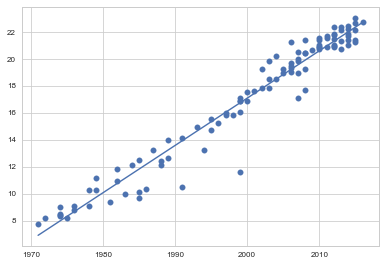

In [59]:
plt.scatter(X,Y)
plt.plot(X,y_hat)
plt.show()

## Evaluating the Models Performance  

In [60]:
d1 = Y - y_hat

In [61]:
d2 = Y - np.mean(Y)

In [62]:
r2 = (1 - np.dot(d1,d1)/np.dot(d2,d2))

In [63]:
print('a:' + str(a) + " and b:" + str(b))

a:0.351043573365 and b:-685.000284382


In [64]:
print("The r-squarred error is: ",r2)

The r-squarred error is:  0.952944285229


  ## THE BASIC EQUATION
  
  ln(tc) = (a*year) + b
  
  tc = exp(b) + exp(a*year)
  
  2*tc = 2 * exp(b) + exp(a*year)
  
  2*tc = exp(ln(2)) * exp(b) + exp(a*year)
  
  2*tc = exp(b) * exp(a * year + ln(2))
  
  exp(b) * exp(a*year2) = exp(b) * exp(a*year1 + ln2)
  
  a * year2 = a*year1 + ln2
  
  year2 = year1 + ln2/a

In [65]:
print("time to double: ", np.log(2)/a, "years")

time to double:  1.97453317238 years
